<div class="alert alert-block alert-warning">
    
## Wide vs Long data
    
This data represents students that obtained a B.S. or M.S. in a STEM degree in the U.S.
    
A wide file has the format of below. Notice how the race/ethnicity data is stored in separate columns.
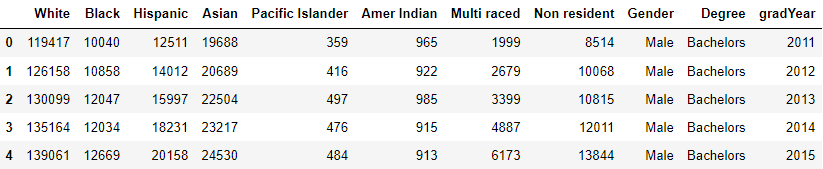

</div>

<div class="alert alert-block alert-warning">
    
## Wide vs Long data
    
A long file has the format of below. Notice how there is now a Race column. This file format allows for easy comparison between race, gender, degree type and gradYear.
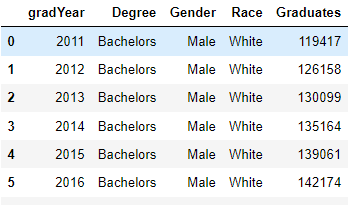

</div>

In [ ]:
# ----------------------------------------------------------
# Dr. Sharon Dill
# July 2020
# ---------------------------------------------------------

# data source: https://nces.ed.gov/programs/coe/current_tables.asp
#              https://nces.ed.gov/programs/digest/d19/tables/dt19_318.45.asp

In [1]:
# load libraries
import pandas as pd
import numpy as np

# allow muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-warning">
    
## Changing a wide to long/tall file:

- The data shows the number of STEM degrees conferred by postsecondary institutions
- The wide file has 32 rows of data with each row representing one year and many races
- 8 rows for Males with a Bachelors (2011 - 2018)
- 8 rows for Females with a Bachelors (2011 - 2018)
- 8 rows for Males with a Masters (2011 - 2018)
- 8 rows for Females with a Masters (2011 - 2018)
- But the challenge is that Race/Ethnicity is spread out over many columns

</div>

In [2]:
# read in wide file
wide = pd.read_csv('STEMwide.csv')

wide.info()
wide.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   White             32 non-null     int64 
 1   Black             32 non-null     int64 
 2   Hispanic          32 non-null     int64 
 3   Asian             32 non-null     int64 
 4   Pacific Islander  32 non-null     int64 
 5   Amer Indian       32 non-null     int64 
 6   Multi raced       32 non-null     int64 
 7   Non resident      32 non-null     int64 
 8   Gender            32 non-null     object
 9   Degree            32 non-null     object
 10  gradYear          32 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 2.9+ KB


,White,Black,Hispanic,Asian,Pacific Islander,Amer Indian,Multi raced,Non resident,Gender,Degree,gradYear
0,119417,10040,12511,19688,359,965,1999,8514,Male,Bachelors,2011
1,126158,10858,14012,20689,416,922,2679,10068,Male,Bachelors,2012
2,130099,12047,15997,22504,497,985,3399,10815,Male,Bachelors,2013
3,135164,12034,18231,23217,476,915,4887,12011,Male,Bachelors,2014
4,139061,12669,20158,24530,484,913,6173,13844,Male,Bachelors,2015
5,142174,12756,22551,26599,449,832,7258,16086,Male,Bachelors,2016
6,146821,13428,25150,28412,432,827,8103,19113,Male,Bachelors,2017
7,149219,13889,27200,30525,446,847,8782,21835,Male,Bachelors,2018
8,58477,8646,7246,13358,218,573,1308,4161,Female,Bachelors,2011
9,61820,9350,8301,14243,278,604,1720,4670,Female,Bachelors,2012


### Creating a tall file from a wide file -  pivot the data

- <b>id_vars</b> are the columns you will keep
- value_vars are the columns you will take from wide to long (not used in this example)
- <b>var_name</b> is the name of the column that represents what the wide columns represented
- <b>value_name</b> is what you will call you value column

### Notice in the new tall file:
- gradYear, Degree and Gender remain as was in the Wide file
- new columns called Graduates that contain the count for the unique row of gradYear+Degree+Gender+Race
- number of rows went from 32 to 256 - which is wide to long/tall!

In [3]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
long = wide.melt(id_vars = ['gradYear', 'Degree', 'Gender'], 
                 var_name = 'Race/Ethnicity',
                 value_name = 'Graduates')

# Graduate count to integer
long['Graduates'] = pd.to_numeric(long['Graduates'])

long.head(10)
long.info()


,gradYear,Degree,Gender,Race/Ethnicity,Graduates
0,2011,Bachelors,Male,White,119417
1,2012,Bachelors,Male,White,126158
2,2013,Bachelors,Male,White,130099
3,2014,Bachelors,Male,White,135164
4,2015,Bachelors,Male,White,139061
5,2016,Bachelors,Male,White,142174
6,2017,Bachelors,Male,White,146821
7,2018,Bachelors,Male,White,149219
8,2011,Bachelors,Female,White,58477
9,2012,Bachelors,Female,White,61820


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gradYear        256 non-null    int64 
 1   Degree          256 non-null    object
 2   Gender          256 non-null    object
 3   Race/Ethnicity  256 non-null    object
 4   Graduates       256 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 10.1+ KB


In [ ]:
# write out as long file
#long.to_csv('STEMlong.csv', header = True, index = False)

### Analysis with the long data - by Gender


In [4]:
yearGender = long.groupby(['gradYear','Gender'])['Graduates'].sum()
yearGender

gradYear  Gender
2011      Female    120641
          Male      233110
2012      Female    129386
          Male      249014
2013      Female    136003
          Male      261712
2014      Female    143851
          Male      274839
2015      Female    154733
          Male      293376
2016      Female    168179
          Male      315757
2017      Female    180119
          Male      336032
2018      Female    190251
          Male      345246
Name: Graduates, dtype: int64

In [5]:
# and by percentage per year
yearGender.groupby(level=0).apply(lambda x: 100*x / x.sum())

gradYear  Gender
2011      Female    34.103366
          Male      65.896634
2012      Female    34.192918
          Male      65.807082
2013      Female    34.196095
          Male      65.803905
2014      Female    34.357400
          Male      65.642600
2015      Female    34.530215
          Male      65.469785
2016      Female    34.752323
          Male      65.247677
2017      Female    34.896571
          Male      65.103429
2018      Female    35.527930
          Male      64.472070
Name: Graduates, dtype: float64

In [6]:
# look at race/ethnicity for first and last year
years = long[(long['gradYear'] == 2011) | (long['gradYear'] == 2018)]
years.groupby(['gradYear','Race/Ethnicity'])['Graduates'].sum()

gradYear  Race/Ethnicity  
2011      Amer Indian           1786
          Asian                41665
          Black                22657
          Hispanic             23244
          Multi raced           3977
          Non resident         45562
          Pacific Islander       673
          White               214187
2018      Amer Indian           1575
          Asian                62122
          Black                31142
          Hispanic             50326
          Multi raced          16983
          Non resident        103605
          Pacific Islander       819
          White               268925
Name: Graduates, dtype: int64